# Data Science Bootcamp Week 7

## Problem A: Bayesian Dice Game (Posterior Inference)

**You are playing a dice game at a carnival. The operator has three dice, each with different biases for rolling a six:**

**| Die | P(6) | P(1–5) |**

**|-----|------|--------|**

**| A   | 0.10 | 0.90   |**

**| B   | 0.30 | 0.70   |**

**| C   | 0.60 | 0.40   |**

**Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it 10 times and tells you how many sixes appeared. Your job is to infer which die was used using Bayes’ Theorem:**

**$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$**

**where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.**

**Tasks:**

**1. Simulate the experiment by picking a random die and rolling it 10 times.**

**2. Compute posterior probabilities for each die given observed sixes.**

**3. Plot likelihoods and posterior probabilities.**

**4. Evaluate inference accuracy over 100 rounds.**

Observed 0 sixes out of 10 rolls
P(A | 0 sixes) = 0.925
P(B | 0 sixes) = 0.075
P(C | 0 sixes) = 0.000
True die: A


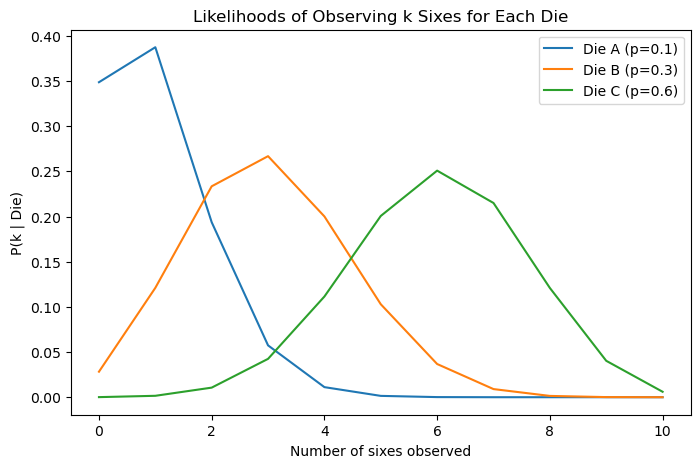

Accuracy over 100 rounds: 0.76


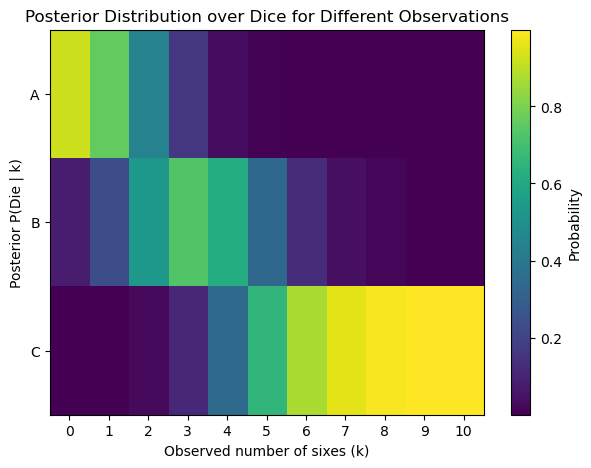

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3], dtype=float)
n_rolls = 10

# compute binomial probability mass function
def binomial_prob(n, k, p):
    # P(K=k) = C(n,k) p^k (1-p)^(n-k)
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    # pick a random die uniformly, roll n_rolls times, count sixes
    true_die = np.random.choice(dice_names)
    p = dice_probs[true_die]
    k = np.random.binomial(n_rolls, p)
    return true_die, int(k)

def posterior_given_k(k):
    # posterior proportional to likelihood * prior
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[d]) for d in dice_names], dtype=float)
    unnorm = likelihoods * prior
    return unnorm / unnorm.sum()

# example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, kk, p) for kk in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
**Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.**

In [2]:
import numpy as np

x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])
X = np.c_[np.ones(len(x)), x]  # intercept + x
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_pred = X @ theta
mse_linear = np.mean((y - y_pred) ** 2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
**Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)**

alpha=1/400 first 5 steps:
step 0: w = 13.0
step 1: w = 12.6
step 2: w = 12.395199999999999
step 3: w = 12.2594063671296
step 4: w = 12.15952886826822
step 5: w = 12.081579122880262

alpha=1/4000000 first 5 steps:
step 0: w = 13.0
step 1: w = 12.99996
step 2: w = 12.999920002399952
step 3: w = 12.999880007199616
step 4: w = 12.999840014398751
step 5: w = 12.99980002399712


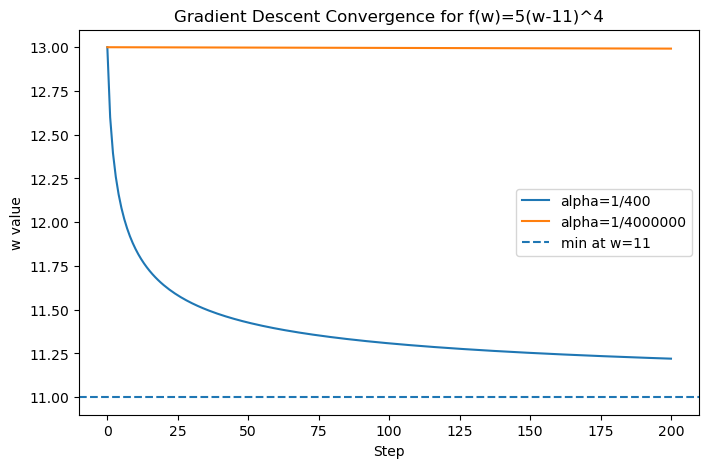

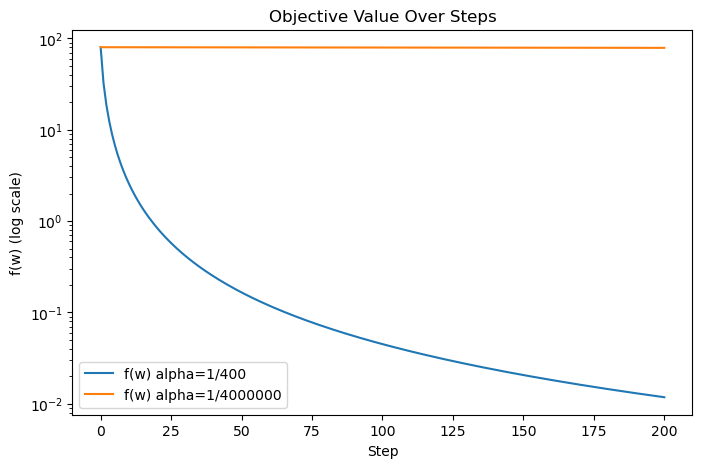

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def grad_descent_vals(w0, alpha, steps):
    w = float(w0)
    hist = [w]
    for _ in range(steps):
        grad = 20 * (w - 11) ** 3
        w = w - alpha * grad
        hist.append(w)
    return np.array(hist)

# run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# print first 5 steps (w0 -> w5)
print("alpha=1/400 first 5 steps:")
for i in range(6):
    print(f"step {i}: w = {hist_140[i]}")

print("\nalpha=1/4000000 first 5 steps:")
for i in range(6):
    print(f"step {i}: w = {hist_180[i]}")

# visualize convergence (w vs step)
plt.figure(figsize=(8,5))
plt.plot(hist_140, label='alpha=1/400')
plt.plot(hist_180, label='alpha=1/4000000')
plt.axhline(11, linestyle='--', label='min at w=11')
plt.xlabel("Step")
plt.ylabel("w value")
plt.title("Gradient Descent Convergence for f(w)=5(w-11)^4")
plt.legend()
plt.show()

# optional: visualize f(w) over steps
def f(w):
    return 5 * (w - 11) ** 4

plt.figure(figsize=(8,5))
plt.plot([f(w) for w in hist_140], label='f(w) alpha=1/400')
plt.plot([f(w) for w in hist_180], label='f(w) alpha=1/4000000')
plt.yscale('log')  # helpful because values can drop fast / be tiny
plt.xlabel("Step")
plt.ylabel("f(w) (log scale)")
plt.title("Objective Value Over Steps")
plt.legend()
plt.show()